Visualizzazione grafica dei risultati ottenuti con sentiment analysis

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [15]:
source = "../doc/sentiment_analysis_all.csv"
df = pd.read_csv(source)

In [16]:
#Conteggio dei tweet 

#positive, negative, neutral
sentiment = df['sentiment'].value_counts()
n_positive = sentiment.get('positive', 0)
n_negative = sentiment.get('negative', 0)   
n_neutral = sentiment.get('neutral', 0)
print("Number of positive examples: ",n_positive)
print("Number of negative examples: ",n_negative)
print("Number of neutral examples: ",n_neutral)
tot = n_positive + n_negative + n_neutral
print("Totale: ",tot)

print("------------------------------------")

# joy, anger, love, sadness, fear, surprise, optimism, pessimism, anticipation, disgust, trust
emotion = df['emotion'].value_counts()

n_joy = emotion.get('joy', 0)
n_anger = emotion.get('anger', 0)
n_sadness = emotion.get('sadness', 0)
n_fear = emotion.get('fear', 0)
n_disgust = emotion.get('disgust', 0)
n_love = emotion.get('love', 0)
n_surprise = emotion.get('surprise', 0)
n_optimism = emotion.get('optimism', 0)
n_pessimism = emotion.get('pessimism', 0)
n_anticipation = emotion.get('anticipation', 0)
n_trust = emotion.get('trust', 0)
print("Number of joy examples: ",n_joy)
print("Number of anger examples: ",n_anger)
print("Number of love examples: ",n_love)
print("Number of sadness examples: ",n_sadness)
print("Number of fear examples: ",n_fear)
print("Number of disgust examples: ",n_disgust)
print("Number of surprise examples: ",n_surprise)
print("Number of optimism examples: ",n_optimism)
print("Number of pessimism examples: ",n_pessimism)
print("Number of anticipation examples: ",n_anticipation)
print("Number of trust examples: ",n_trust)
tot = n_joy + n_anger + n_love + n_sadness + n_fear + n_disgust + n_surprise + n_optimism + n_pessimism + n_anticipation + n_trust
print("Totale: ",tot)

#hate, not-hate
hate = df['hate'].value_counts()
n_hate = hate.get('hate', 0)
n_not_hate = hate.get('not-hate', 0)
print("Number of hate examples: ",n_hate)
print("Number of not-hate examples: ",n_not_hate)
tot = n_hate + n_not_hate
print("Totale: ",tot)

#offensive, non-offensive
offensive = df['offensive'].value_counts()
n_offensive = offensive.get('offensive', 0)
n_non_offensive = offensive.get('non-offensive', 0)
print("Number of offensive examples: ",n_offensive)
print("Number of non-offensive examples: ",n_non_offensive)
tot = n_offensive + n_non_offensive
print("Totale: ",tot)



Number of positive examples:  21071
Number of negative examples:  23108
Number of neutral examples:  25821
Totale:  70000
------------------------------------
Number of joy examples:  11063
Number of anger examples:  18909
Number of love examples:  3
Number of sadness examples:  1992
Number of fear examples:  3666
Number of disgust examples:  6397
Number of surprise examples:  59
Number of optimism examples:  14297
Number of pessimism examples:  0
Number of anticipation examples:  13614
Number of trust examples:  0
Totale:  70000
Number of hate examples:  2400
Number of not-hate examples:  67600
Totale:  70000
Number of offensive examples:  4315
Number of non-offensive examples:  65685
Totale:  70000


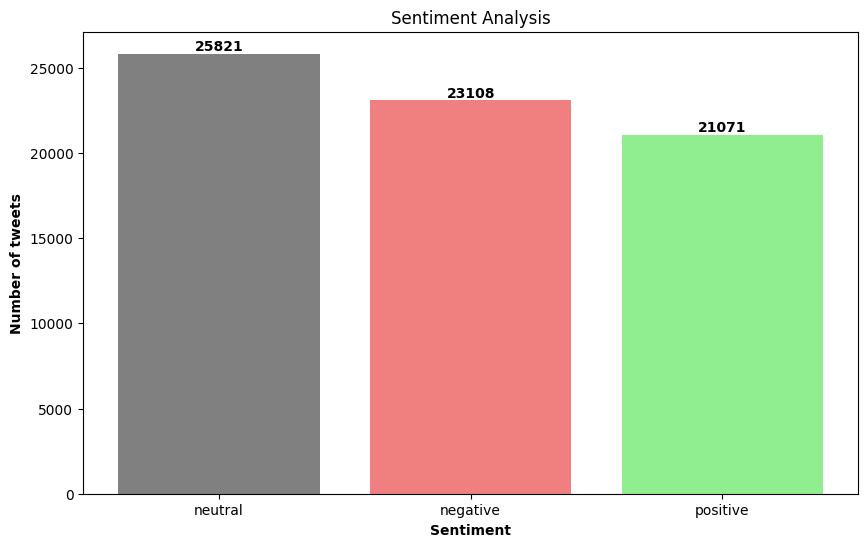

In [17]:
#Plotting
counts = [n_neutral, n_negative, n_positive]
colors = ['grey', 'lightcoral', 'lightgreen']
fig = plt.figure(figsize=(10,6))
bars = plt.bar(sentiment.index, sentiment.values, color=colors)
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment', fontweight='bold')
plt.ylabel('Number of tweets', fontweight='bold')
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, str(count), ha='center', va='bottom', color='black', fontweight='bold')

plt.show()
fig.savefig('./result sentimental analysis/grafici/sentimentXtweet.png', dpi=300, bbox_inches='tight')

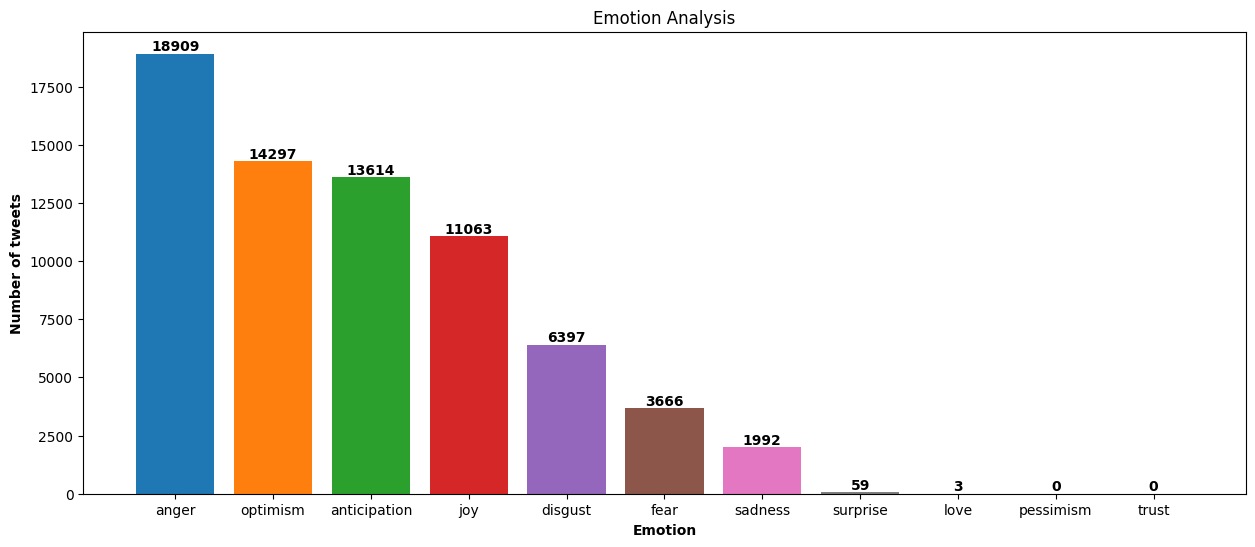

In [18]:
#plotting emotion

# Create a DataFrame with all possible emotions and merge with 'emotion' to fill missing values with zeros
all_emotions = pd.Series(index=['joy', 'anger', 'fear', 'trust', 'surprise', 'disgust', 'sadness', 'pessimism'], dtype=int)
emotion = all_emotions.combine_first(emotion).fillna(0).astype(int)
emotion = emotion.sort_values(ascending=False)

colors = plt.cm.tab10(np.linspace(0, 1, len(emotion)))
fig = plt.figure(figsize=(15, 6))
bars = plt.bar(emotion.index, emotion.values, color=colors)

plt.title('Emotion Analysis')
plt.xlabel('Emotion', fontweight='bold')
plt.ylabel('Number of tweets', fontweight='bold')

# Add exact numbers on top of the bars
for bar, count in zip(bars, emotion.values):
    plt.text(bar.get_x() + bar.get_width() / 2 , bar.get_height() + 0.1, str(count), ha='center', va='bottom', color='black', fontweight='bold')

plt.show()
fig.savefig('./result sentimental analysis/grafici/emotionXtweet.png', dpi=300, bbox_inches='tight')

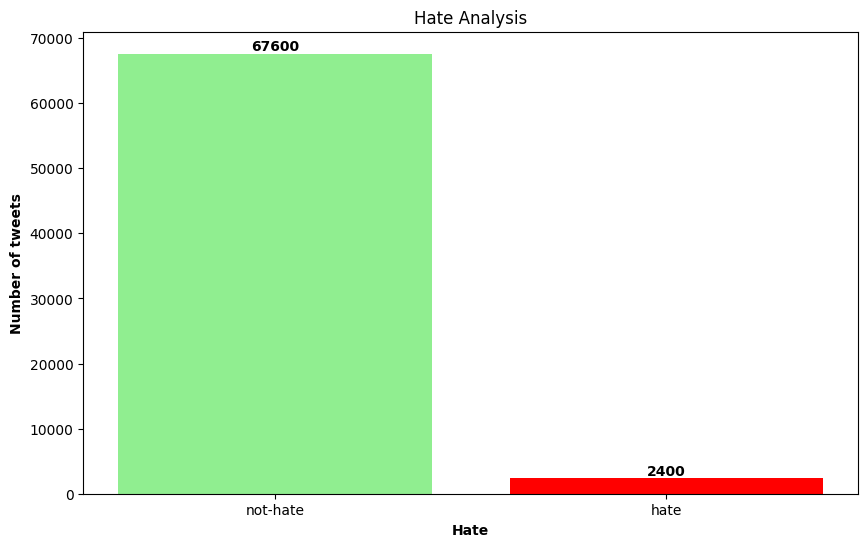

In [19]:
#Plotting hate
colors = ['lightgreen', 'red']
fig = plt.figure(figsize=(10,6))
bars = plt.bar(hate.index, hate.values, color=colors)
plt.title('Hate Analysis')
plt.xlabel('Hate', fontweight='bold')
plt.ylabel('Number of tweets', fontweight='bold')
#count the hate example and plot the number on top of the bar
for bar, count in zip(bars, hate.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, str(count), ha='center', va='bottom', color='black', fontweight='bold')

plt.show()
fig.savefig('./result sentimental analysis/grafici/hateXtweet.png', dpi=300, bbox_inches='tight')

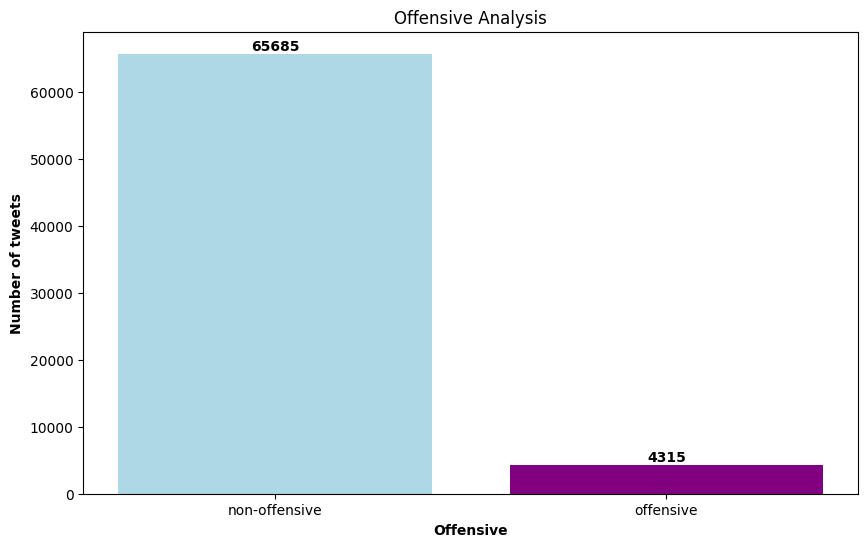

In [20]:
#plotting offensive
colors = ['lightblue', 'purple']
fig = plt.figure(figsize=(10,6))
bars = plt.bar(offensive.index, offensive.values, color=colors)
plt.title('Offensive Analysis')
plt.xlabel('Offensive', fontweight='bold')
plt.ylabel('Number of tweets', fontweight='bold')
#count the offensive example and plot the number on top of the bar
for bar, count in zip(bars, offensive.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, str(count), ha='center', va='bottom', color='black', fontweight='bold')

plt.show()
fig.savefig('./result sentimental analysis/grafici/offensiveXtweet.png', dpi=300, bbox_inches='tight')

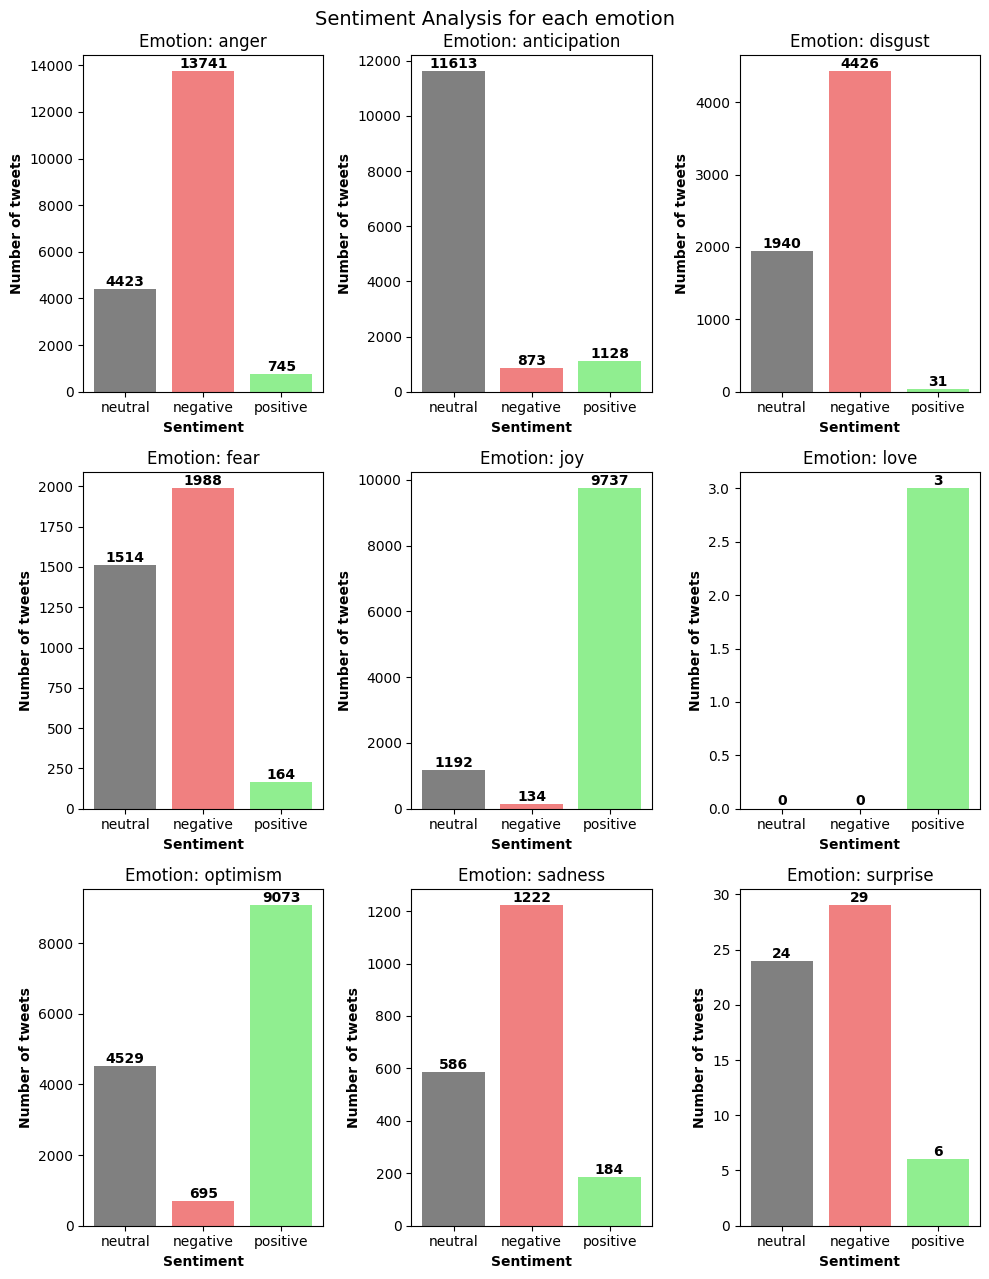

In [21]:
#Plotting sentiment for each emotion
# Get unique sentiments and emotions
sentiments = df['sentiment'].unique()
emotions = df['emotion'].unique()

# Define the desired order for sentiments
sentiment_order = ['neutral', 'negative', 'positive']

# Create a grid of subplots
num_rows = 3
num_cols = 3
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(10, 13))
fig.suptitle('Sentiment Analysis for each emotion', fontsize=14)

# Plot for each emotion
for i, emotion in enumerate(emotions):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]

    # Count the number of each sentiment for the current emotion
    counts = df[df['emotion'] == emotion]['sentiment'].value_counts()

    # Plot the bar chart with specified order for x-axis ticks
    bars = ax.bar(sentiment_order, [counts.get(sentiment, 0) for sentiment in sentiment_order],
                  color=['grey', 'lightcoral', 'lightgreen'])
    ax.set_title(f'Emotion: {emotion}')
    ax.set_xlabel('Sentiment', fontweight='bold')
    ax.set_ylabel('Number of tweets', fontweight='bold')

    # Add numbers on top of the bars
    for bar, count in zip(bars, [counts.get(sentiment, 0) for sentiment in sentiment_order]):
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.005, str(count),
                ha='center', va='bottom', color='black', fontweight='bold')

plt.tight_layout()
plt.show()
fig.savefig('./result sentimental analysis/grafici/sentimentXemotion.png', dpi=300, bbox_inches='tight')

/tmp/ipykernel_20810/3738785035.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(emotion_order, rotation=45, ha='right')
/tmp/ipykernel_20810/3738785035.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(emotion_order, rotation=45, ha='right')
/tmp/ipykernel_20810/3738785035.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(emotion_order, rotation=45, ha='right')


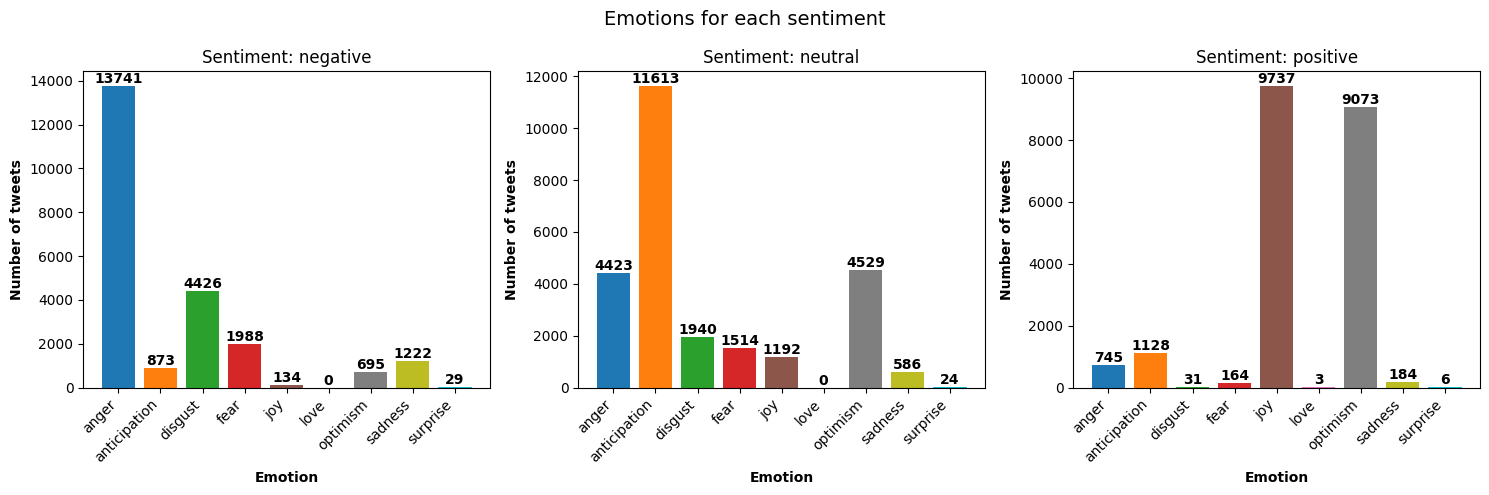

In [22]:
#emotion analysis for each sentiment
#Plotting sentiment for each emotion
# Get unique sentiments and emotions
sentiments = df['sentiment'].unique()
emotions = df['emotion'].unique()
colors = plt.cm.tab10(np.linspace(0, 1, len(emotions)))

# Define the desired order for sentiments
emotion_order = []
for emotion in emotions:
    emotion_order.append(emotion)

# Create a grid of subplots
num_rows = 1
num_cols = 3
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5))
fig.suptitle('Emotions for each sentiment', fontsize=14)

# Plot for each emotion
for i, sentiment in enumerate(sentiments):
    ax = axes[i]

    # Count the number of each emotion for the current sentiment
    counts = df[df['sentiment'] == sentiment]['emotion'].value_counts()

    # Plot the bar chart with specified order for x-axis ticks
    bars = ax.bar(emotion_order, [counts.get(emotion, 0) for emotion in emotion_order],
                  color=colors)
    ax.set_title(f'Sentiment: {sentiment}')
    ax.set_xlabel('Emotion', fontweight='bold')
    ax.set_ylabel('Number of tweets', fontweight='bold')
    ax.set_xticklabels(emotion_order, rotation=45, ha='right')

    # Add numbers on top of the bars
    for bar, count in zip(bars, [counts.get(emotion, 0) for emotion in emotion_order]):
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.005, str(count),
                ha='center', va='bottom', color='black', fontweight='bold')

plt.tight_layout()
plt.show()
fig.savefig('./result sentimental analysis/grafici/emotionXsentiment.png', dpi=300, bbox_inches='tight')

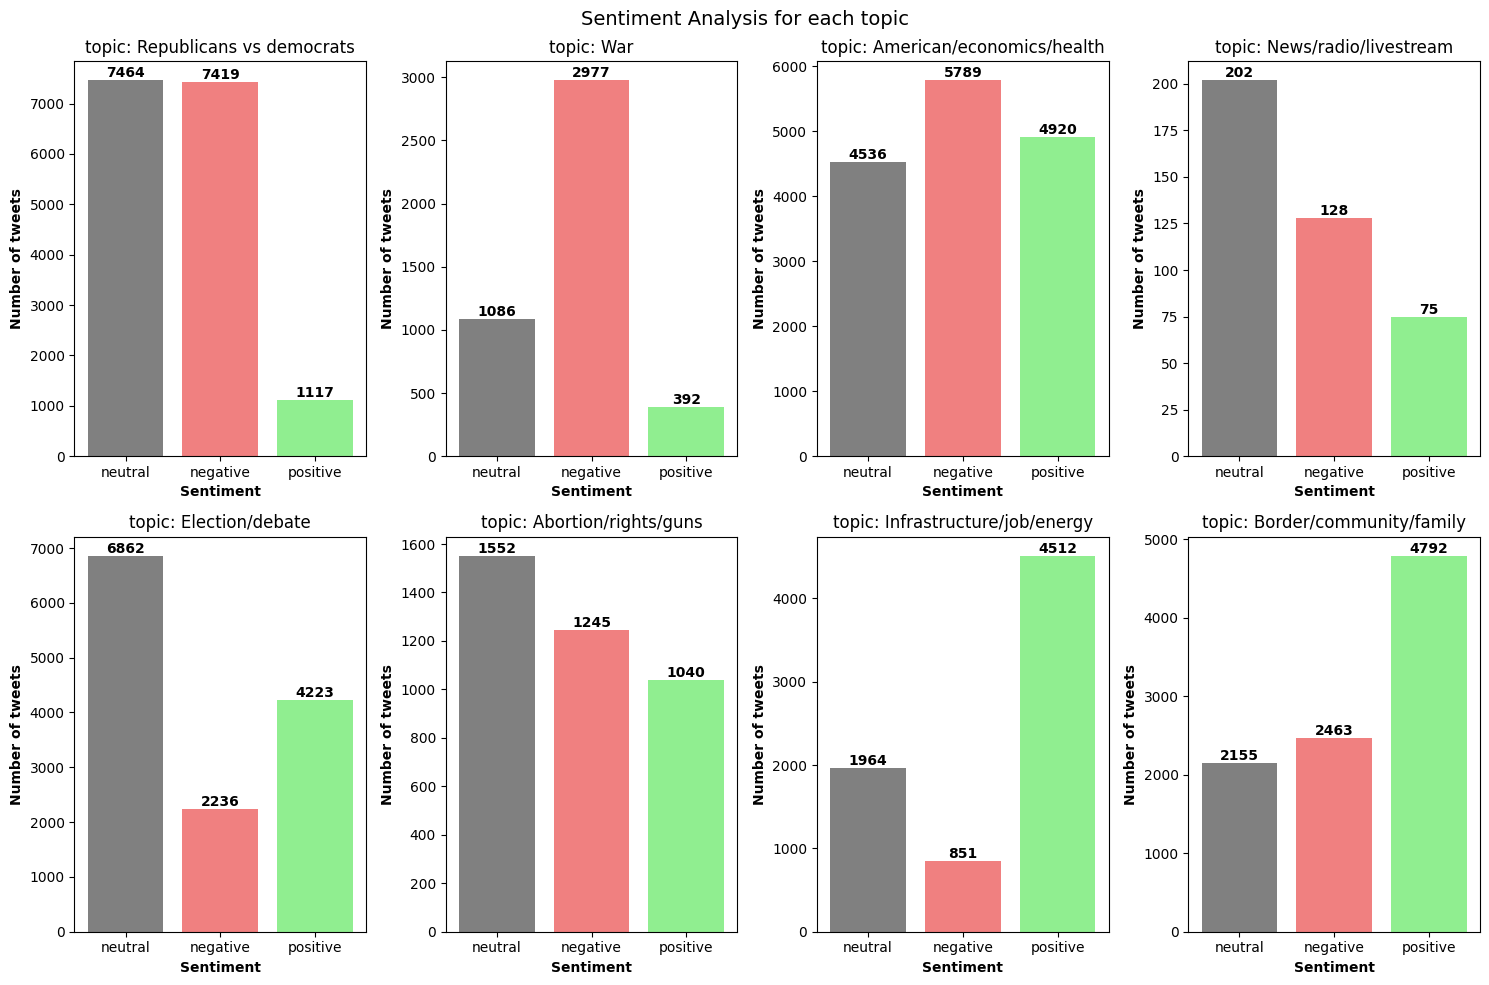

In [23]:
#plotting sentiment for each topic

# Get unique sentiments and topics
sentiments = df['sentiment'].unique()
topics = df['first_topic_name'].unique()

# Define the desired order for sentiments
sentiment_order = ['neutral', 'negative', 'positive']

# Create a grid of subplots
num_rows = 2
num_cols = 4
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 10))
fig.suptitle('Sentiment Analysis for each topic', fontsize=14)

# Plot for each topic
for i, topic in enumerate(topics):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]

    # Count the number of each sentiment for the current topic
    counts = df[df['first_topic_name'] == topic]['sentiment'].value_counts()

    # Plot the bar chart with specified order for x-axis ticks
    bars = ax.bar(sentiment_order, [counts.get(sentiment, 0) for sentiment in sentiment_order],
                  color=['grey', 'lightcoral', 'lightgreen'])
    ax.set_title(f'topic: {topic}')
    ax.set_xlabel('Sentiment', fontweight='bold')
    ax.set_ylabel('Number of tweets', fontweight='bold')

    # Add numbers on top of the bars
    for bar, count in zip(bars, [counts.get(sentiment, 0) for sentiment in sentiment_order]):
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.005, str(count),
                ha='center', va='bottom', color='black', fontweight='bold')

plt.tight_layout()
plt.show()
fig.savefig('./result sentimental analysis/grafici/sentimentXtopic.png', dpi=300, bbox_inches='tight')

/tmp/ipykernel_20810/1156481455.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(emotion_order, rotation=45, ha='right')
/tmp/ipykernel_20810/1156481455.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(emotion_order, rotation=45, ha='right')
/tmp/ipykernel_20810/1156481455.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(emotion_order, rotation=45, ha='right')
/tmp/ipykernel_20810/1156481455.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(emotion_order, rotation=45, ha='right')
/tmp/ipykernel_20810/1156481455.py:36: UserWarning: set_ticklabels() should only be used

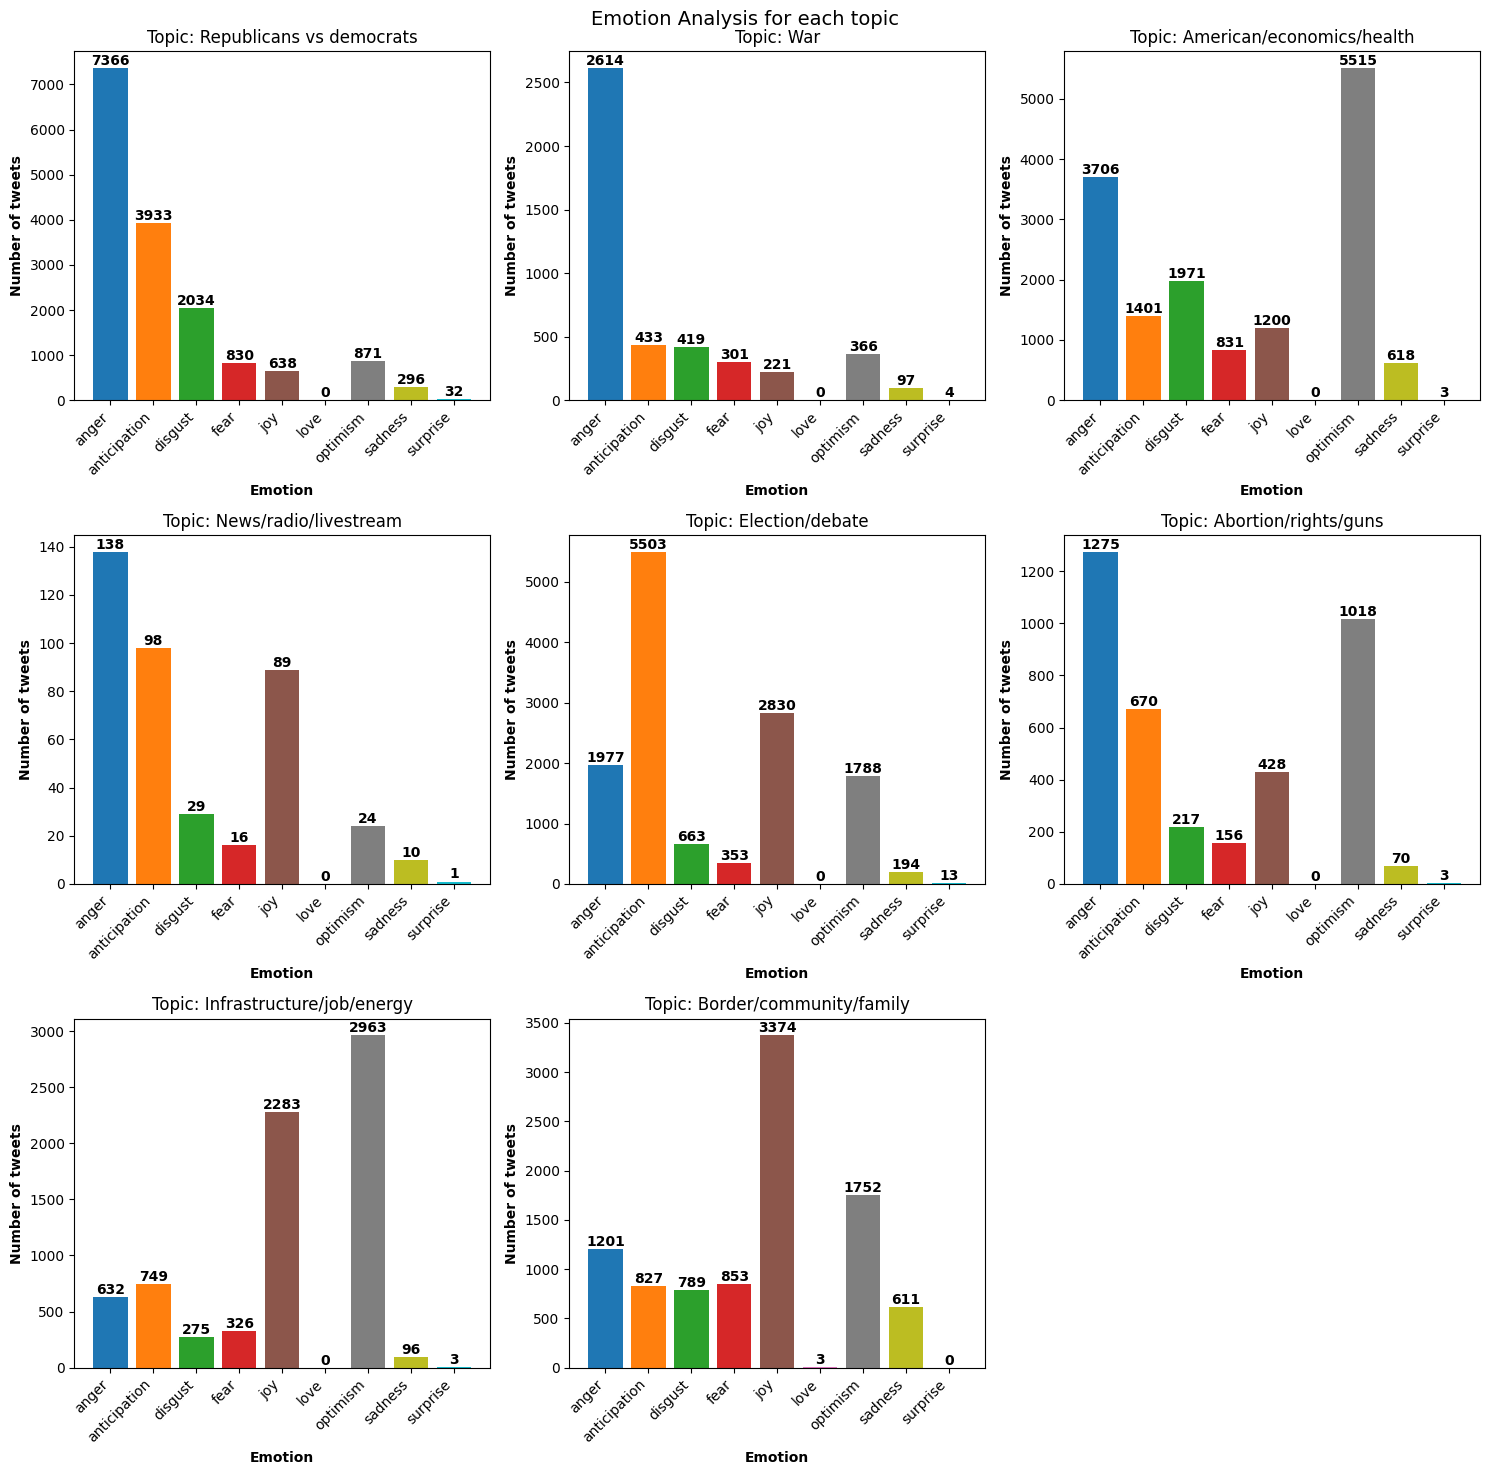

In [24]:
#plotting emotions for each topic

# Get unique emotions and topics
emotions = df['emotion'].unique()
topics = df['first_topic_name'].unique()
colors = plt.cm.tab10(np.linspace(0, 1, len(emotions)))

# Define the desired order for emotions
emotion_order = []
for i, emotion in enumerate(emotions):
    emotion_order.append(emotion)

# Create a grid of subplots
num_rows = 3
num_cols = 3
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 15))
fig.suptitle('Emotion Analysis for each topic', fontsize=14)

# Plot for each topic
for i, topic in enumerate(topics):
    
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]

    # Count the number of each emotion for the current topic
    counts = df[df['first_topic_name'] == topic]['emotion'].value_counts()

    # Plot the bar chart with specified order for x-axis ticks
    bars = ax.bar(emotion_order, [counts.get(emotion, 0) for emotion in emotion_order],
                  color=colors)
    ax.set_title(f'Topic: {topic}')
    ax.set_xlabel('Emotion', fontweight='bold')
    ax.set_ylabel('Number of tweets', fontweight='bold')
    # Rotate x-axis labels at 45 degrees
    ax.set_xticklabels(emotion_order, rotation=45, ha='right')

    # Add numbers on top of the bars
    for bar, count in zip(bars, [counts.get(emotion, 0) for emotion in emotion_order]):
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.005, str(count),
                ha='center', va='bottom', color='black', fontweight='bold')
        
# Remove the last subplot
fig.delaxes(axes.flatten()[-1])

plt.tight_layout()
plt.show()
fig.savefig('./result sentimental analysis/grafici/emotionXtopic.png', dpi=300, bbox_inches='tight')


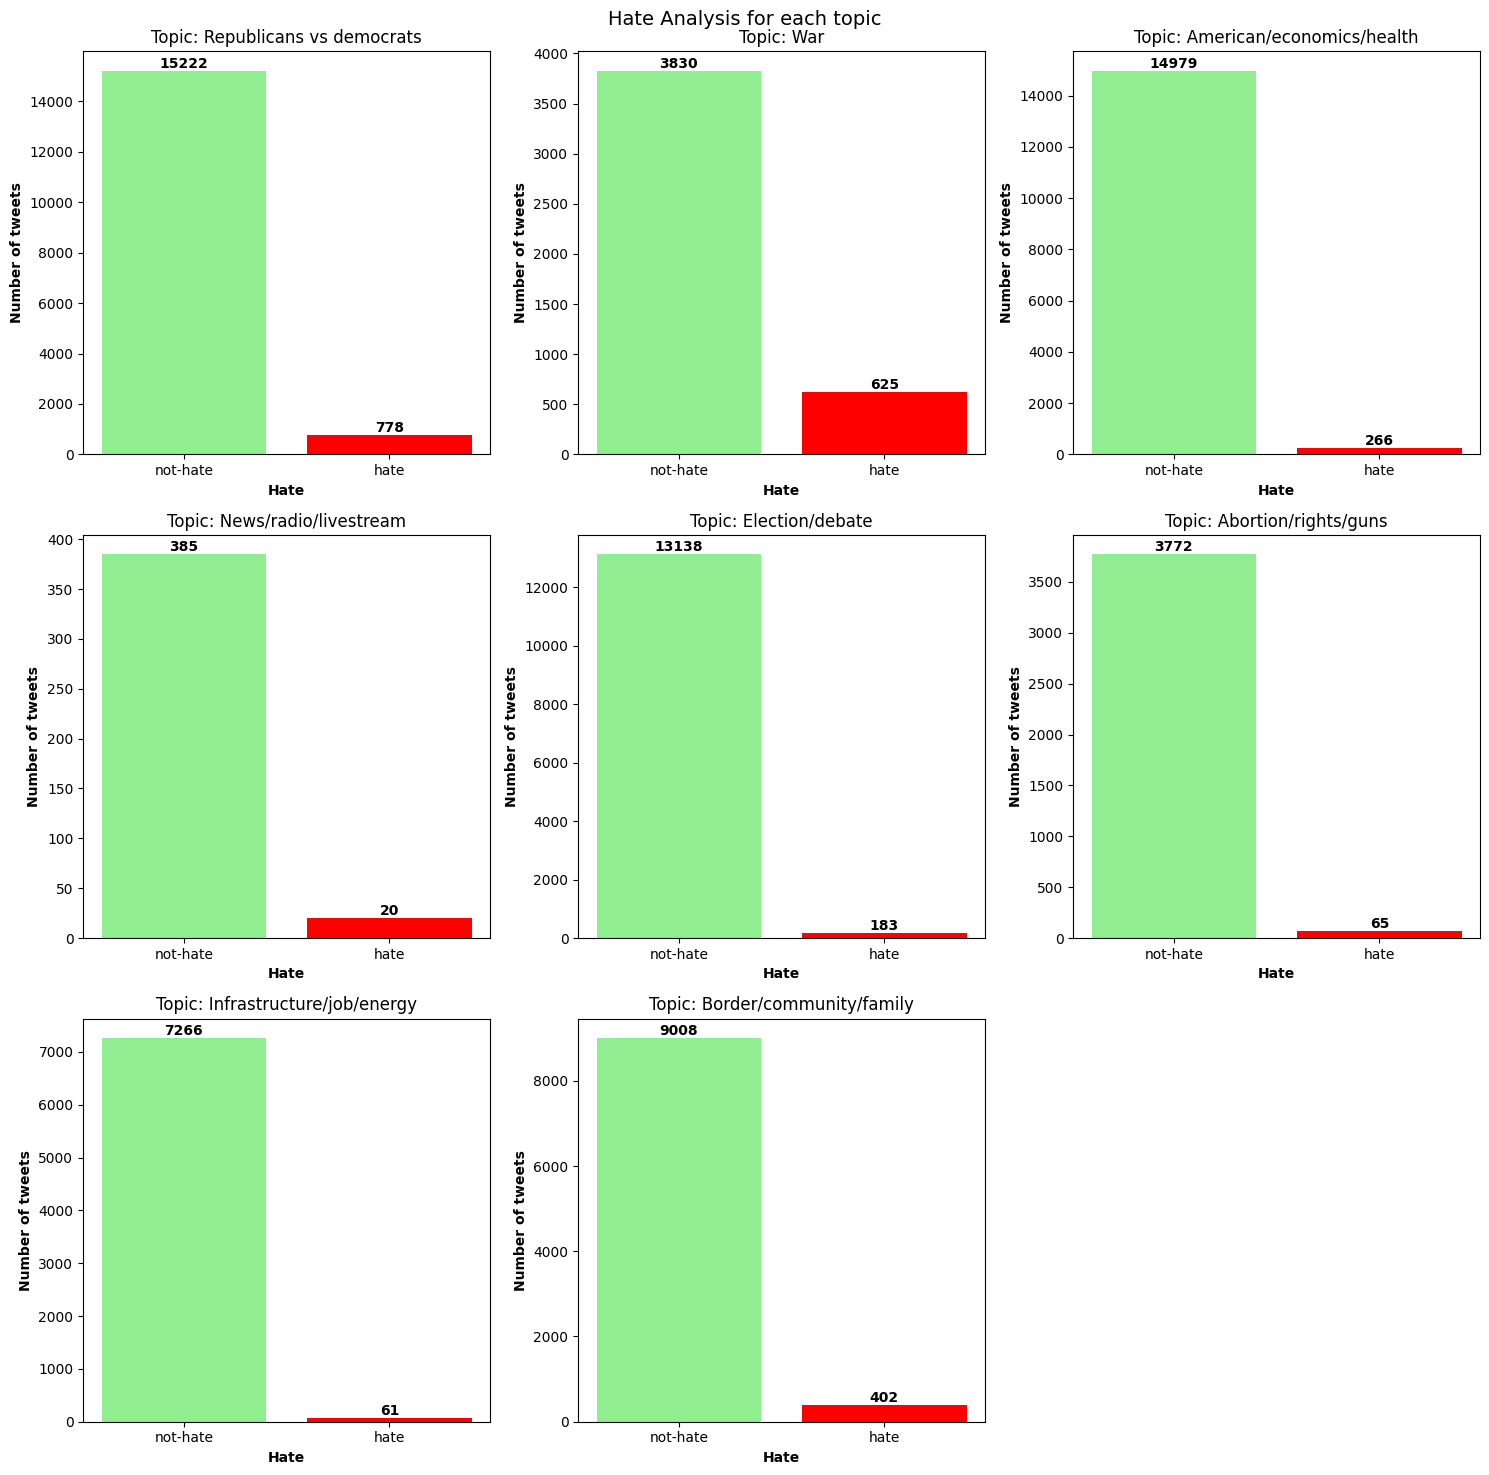

In [25]:
# Plotting hate for each topic
# Get unique topics
topics = df['first_topic_name'].unique()

# Create a grid of subplots
num_rows = 3
num_cols = 3
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 15))
fig.suptitle('Hate Analysis for each topic', fontsize=14)

# Plot for each topic
for i, topic in enumerate(topics):
    
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]

    # Count the number of hate for the current topic
    counts = df[df['first_topic_name'] == topic]['hate'].value_counts()

    # Plot the bar chart with specified order for x-axis ticks
    bars = ax.bar(counts.index, counts.values, color=['lightgreen', 'red'])
    ax.set_title(f'Topic: {topic}')
    ax.set_xlabel('Hate', fontweight='bold')
    ax.set_ylabel('Number of tweets', fontweight='bold')

    # Add numbers on top of the bars
    for bar, count in zip(bars, counts.values):
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, str(count),
                ha='center', va='bottom', color='black', fontweight='bold')
# Remove the last subplot
fig.delaxes(axes.flatten()[-1])

plt.tight_layout()
plt.show()
fig.savefig('./result sentimental analysis/grafici/hateXtopic.png', dpi=300, bbox_inches='tight')


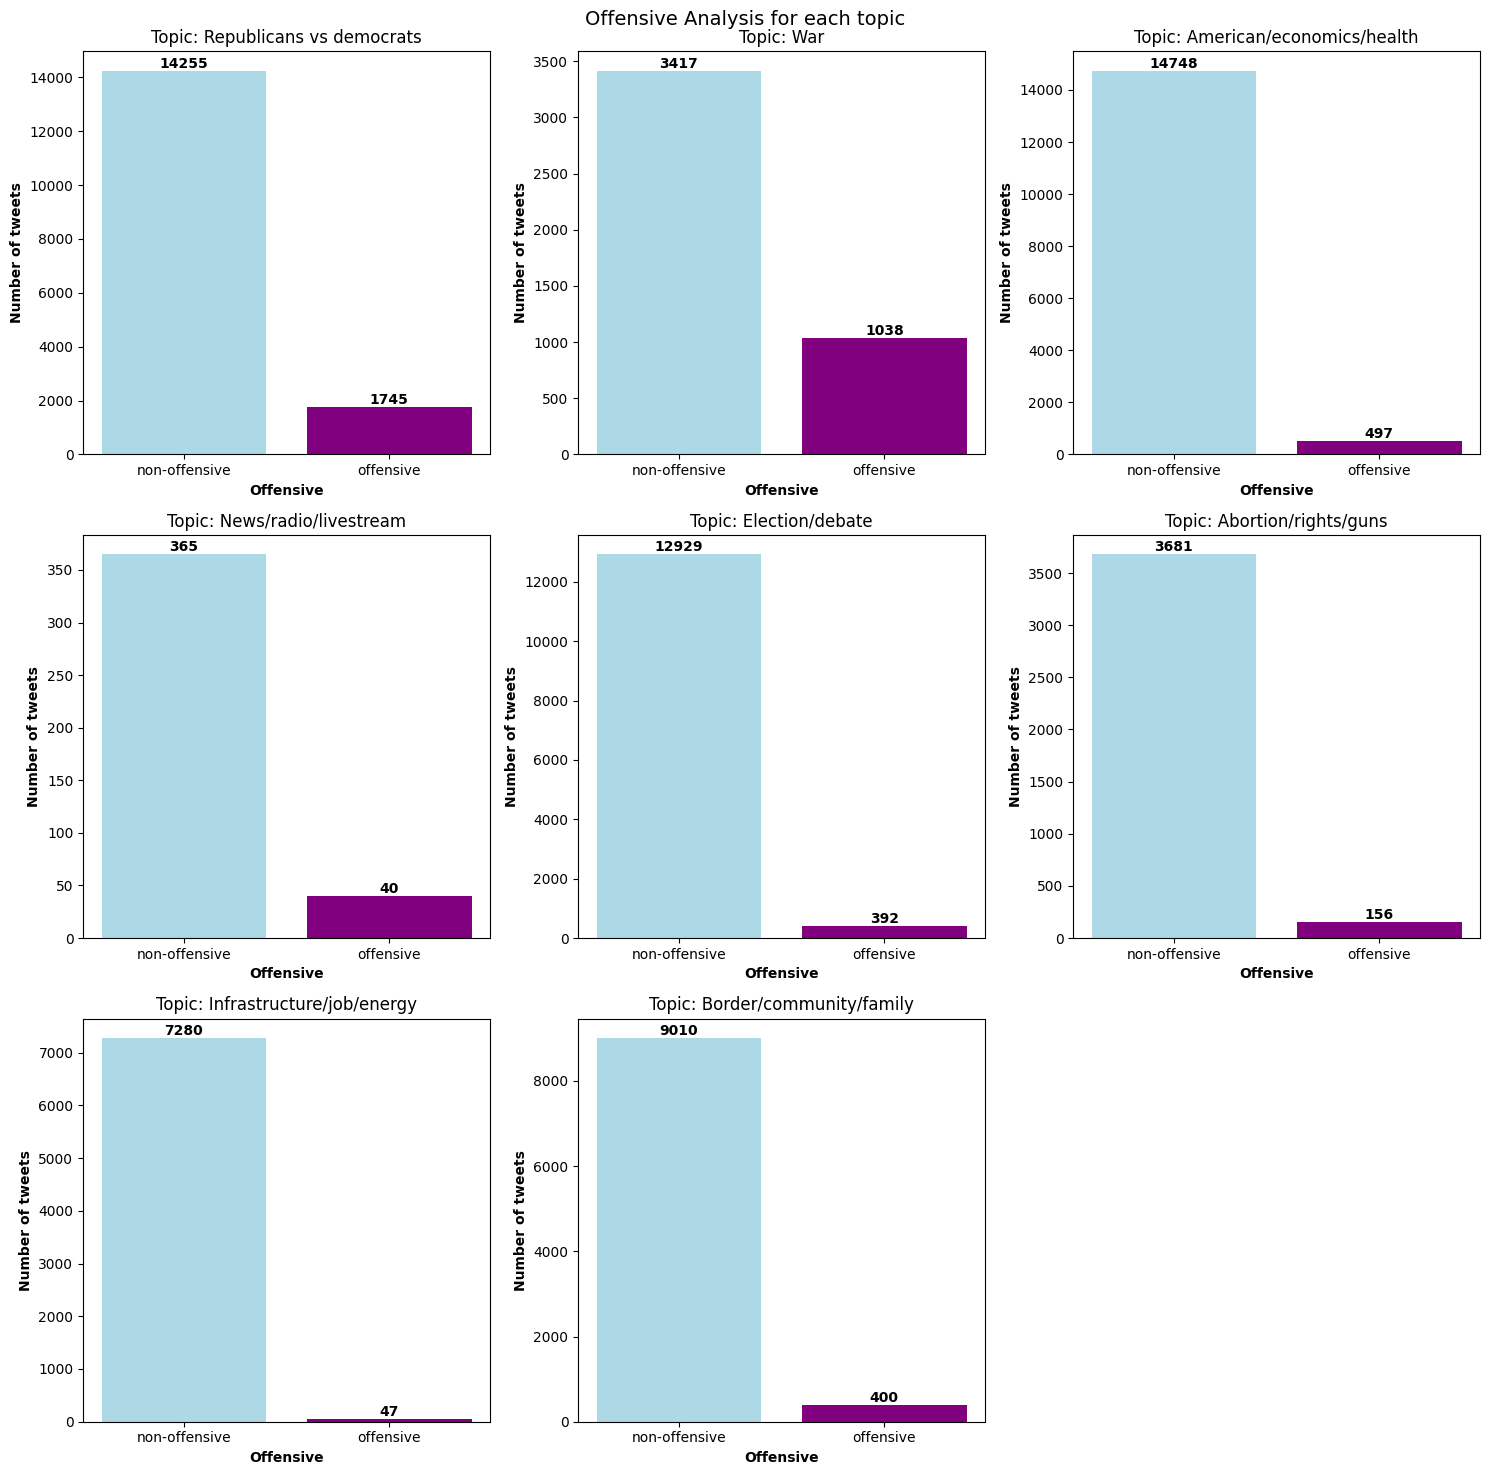

In [26]:
#plot offensive for each topic
# Get unique topics
topics = df['first_topic_name'].unique()

# Create a grid of subplots
num_rows = 3
num_cols = 3
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 15))
fig.suptitle('Offensive Analysis for each topic', fontsize=14)

# Plot for each topic
for i, topic in enumerate(topics):
    
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]

    # Count the number of offensive for the current topic
    counts = df[df['first_topic_name'] == topic]['offensive'].value_counts()

    # Plot the bar chart with specified order for x-axis ticks
    bars = ax.bar(counts.index, counts.values, color=['lightblue', 'purple'])
    ax.set_title(f'Topic: {topic}')
    ax.set_xlabel('Offensive', fontweight='bold')
    ax.set_ylabel('Number of tweets', fontweight='bold')

    # Add numbers on top of the bars
    for bar, count in zip(bars, counts.values):
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, str(count),
                ha='center', va='bottom', color='black', fontweight='bold')
# Remove the last subplot
fig.delaxes(axes.flatten()[-1])

plt.tight_layout()
plt.show()
fig.savefig('./result sentimental analysis/grafici/offensiveXtopic.png', dpi=300, bbox_inches='tight')


In [27]:
#Show some random tweets for each emotion
emotions = df['emotion'].unique()

for emotion in emotions:
    print(f'Emotion: {emotion}')
    
    # Sample 5 tweets for the current emotion
    sampled_tweets = df[df['emotion'] == emotion]
    if len(sampled_tweets) > 5:
        sampled_tweets = sampled_tweets.sample(10)
    
    
    # Iterate over the rows using iterrows()
    for index, tweet in sampled_tweets.iterrows():
        print(f"{index}) topic: {tweet['first_topic_name']}, sentiment: {tweet['sentiment']}, prob_emotion: {tweet['emotion_prob']}, {tweet['text']}")
    
    print('\n')

Emotion: anger
8363) topic: Election/debate, sentiment: negative, prob_emotion: 0.715911865234375, Two brown people #Republicans will never vote for! Nimrata Haley and Vivek Ramaswamy. Also, Uncle Tim Scott! White supremacy is the GOP brand at the moment, and these folks are just a little too tan. #GOPDebate
18450) topic: American/economics/health, sentiment: negative, prob_emotion: 0.5455663800239563, NEWS: A new survey found that 1 in 5 mothers endured some kind of mistreatment or discrimination by their healthcare providers during maternity care. That's unacceptable. ALL moms should be heard and provided the best care. https://t.co/NyX5QTZvEm
9629) topic: Infrastructure/job/energy, sentiment: positive, prob_emotion: 0.5545342564582825, RT @Starbucks partners should be respected, protected and paid! Today, @SBWorkersUnited &amp; customers are out in force demanding Starbucks quit union-busting &amp; come to the bargaining table! #SolidaritySeason https://t.co/yLx9j7Lqhn
5548) topic: 